# Import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.calibration import calibration_curve
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import average_precision_score

In [ ]:
#Importing the dataset
data = pd.read_csv('hdddata.csv')
#Removing null values
data.dropna(axis=0, inplace=True)
data.dropna(axis=1, inplace=True)
df=data.iloc[:,1:49:2] #data if included raw data is also used, df is used for only normalized values
df

,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,smart_10_normalized,smart_12_normalized,smart_183_normalized,smart_184_normalized,...,smart_191_normalized,smart_192_normalized,smart_193_normalized,smart_194_normalized,smart_197_normalized,smart_198_normalized,smart_199_normalized,smart_240_normalized,smart_241_normalized,smart_242_normalized
0,115.0,96.0,100.0,100.0,89.0,62.0,100.0,100.0,100.0,100.0,...,100.0,100.0,98.0,30.0,100.0,100.0,200.0,100.0,100.0,100.0
1,111.0,92.0,100.0,100.0,81.0,58.0,100.0,100.0,100.0,100.0,...,100.0,100.0,70.0,24.0,100.0,100.0,200.0,100.0,100.0,100.0
2,119.0,94.0,100.0,100.0,90.0,77.0,100.0,100.0,100.0,100.0,...,100.0,100.0,90.0,31.0,100.0,100.0,200.0,100.0,100.0,100.0
3,111.0,92.0,100.0,100.0,85.0,68.0,100.0,100.0,100.0,100.0,...,100.0,100.0,95.0,23.0,100.0,100.0,200.0,100.0,100.0,100.0
4,117.0,92.0,100.0,100.0,90.0,78.0,100.0,100.0,100.0,100.0,...,100.0,100.0,95.0,36.0,100.0,100.0,200.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380073,117.0,97.0,100.0,100.0,87.0,67.0,100.0,100.0,100.0,100.0,...,100.0,100.0,91.0,37.0,100.0,100.0,200.0,100.0,100.0,100.0
380074,120.0,92.0,100.0,100.0,83.0,61.0,100.0,100.0,100.0,100.0,...,100.0,100.0,66.0,24.0,100.0,100.0,200.0,100.0,100.0,100.0
380075,119.0,95.0,100.0,100.0,84.0,71.0,100.0,100.0,100.0,100.0,...,100.0,100.0,96.0,18.0,100.0,100.0,200.0,100.0,100.0,100.0
380076,113.0,91.0,100.0,100.0,84.0,61.0,100.0,100.0,100.0,100.0,...,100.0,100.0,86.0,29.0,100.0,100.0,200.0,100.0,100.0,100.0


In [ ]:
result=data['failure']

#Selecting normalized values from the dataset for training
inputs=data.iloc[:,1:49:2]

X_train, X_test, y_train, y_test = train_test_split(inputs, result, test_size=0.3)

In [ ]:
def rocs_curve(model):

  y_scores = model.predict_proba(X_test)[:, 1]

  # Compute ROC curve and ROC area for each class
  fpr, tpr, _ = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)

  # Plot ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

In [ ]:

def pr_rc_curve(model):

  y_scores = model.predict_proba(X_test)[:, 1]

  # Compute precision-recall curve values
  precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

  # Compute area under the curve (AUC) for precision-recall
  pr_auc = auc(recall, precision)

  # Compute average precision score
  average_precision = average_precision_score(y_test, y_scores)

  # Plot Precision-Recall curve
  plt.figure(figsize=(8, 6))
  plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f}, Avg Precision = {average_precision:.2f})')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend()
  plt.show()

In [ ]:
def conf(pred,text):
  cf=confusion_matrix(y_test,pred)
  sns.heatmap(cf, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(text+" Confusion Matrix")
  plt.show()


# Without SMOTE

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Print accuracy classification report for KNN
print('Classification Report for KNN:')
print(classification_report(y_test, y_pred_knn))
confusion_matrix(y_test,y_pred_knn)

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    110261
           1       0.87      0.68      0.76      3758

    accuracy                           0.99    114019
   macro avg       0.93      0.84      0.88    114019
weighted avg       0.99      0.99      0.99    114019



array([[109891,    370],
       [  1202,   2556]])

In [ ]:
# Create DT classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Print accuracy classification report for DT
print('Classification Report for DT:')
print(classification_report(y_test, y_pred_dt))

Classification Report for DT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110260
           1       0.91      0.86      0.88      3759

    accuracy                           0.99    114019
   macro avg       0.95      0.93      0.94    114019
weighted avg       0.99      0.99      0.99    114019



In [ ]:

# Create RF classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Print accuracy classification report for RF
print('Classification Report for RF:')
print(classification_report(y_test, y_pred_rf))

Classification Report for RF:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    110261
           1       0.93      0.82      0.87      3758

    accuracy                           0.99    114019
   macro avg       0.96      0.91      0.93    114019
weighted avg       0.99      0.99      0.99    114019



In [ ]:

# Create Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_classifier.predict(X_test)

# Print classification report for Naive Bayes
print('Classification Report for Naive Bayes:')
print(classification_report(y_test, y_pred_nb))


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    110261
           1       0.31      0.16      0.21      3758

    accuracy                           0.96    114019
   macro avg       0.64      0.57      0.59    114019
weighted avg       0.95      0.96      0.95    114019



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Print classification report for SVM
print('Classification Report for SVM:')
print(classification_report(y_test, y_pred_svm))


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     11220
           1       0.00      0.00      0.00       313

    accuracy                           0.97     11533
   macro avg       0.49      0.50      0.49     11533
weighted avg       0.95      0.97      0.96     11533



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


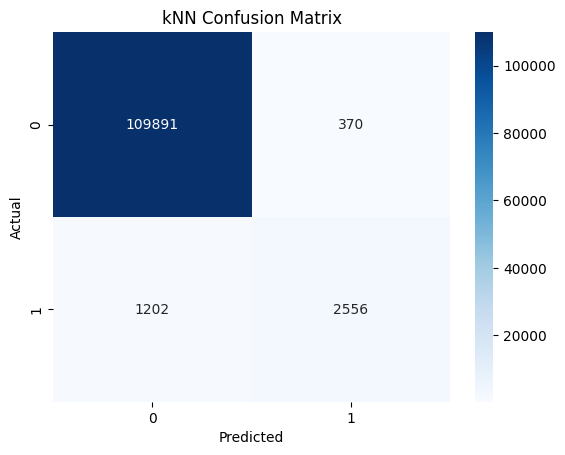

In [ ]:
conf(y_pred_knn,"kNN")

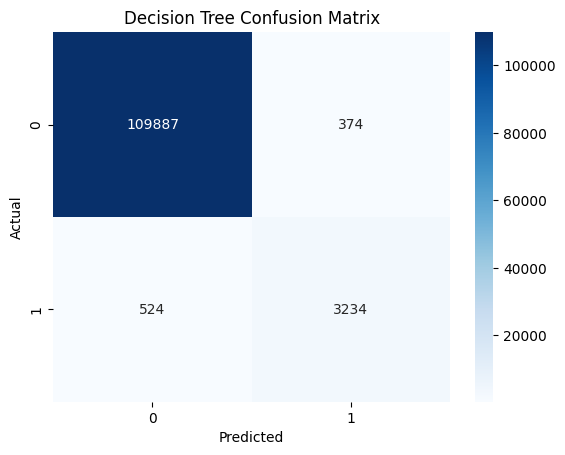

In [ ]:
conf(y_pred_dt,"Decision Tree")

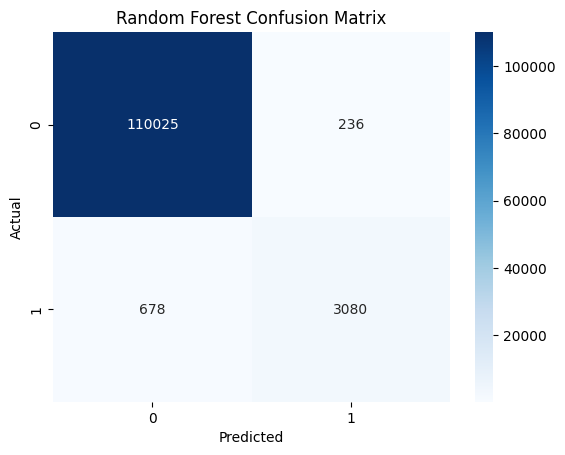

In [ ]:
conf(y_pred_rf,"Random Forest")

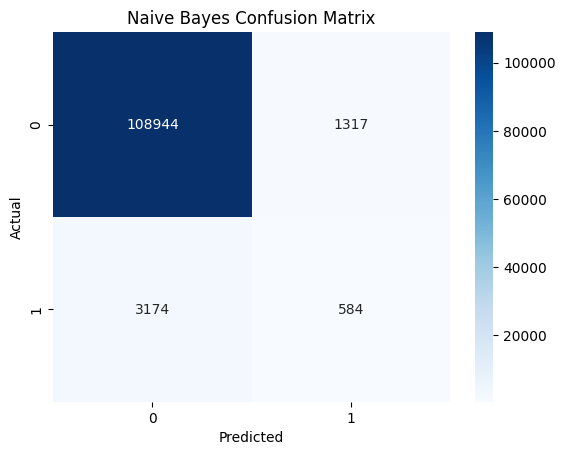

In [ ]:
conf(y_pred_nb,"Naive Bayes")

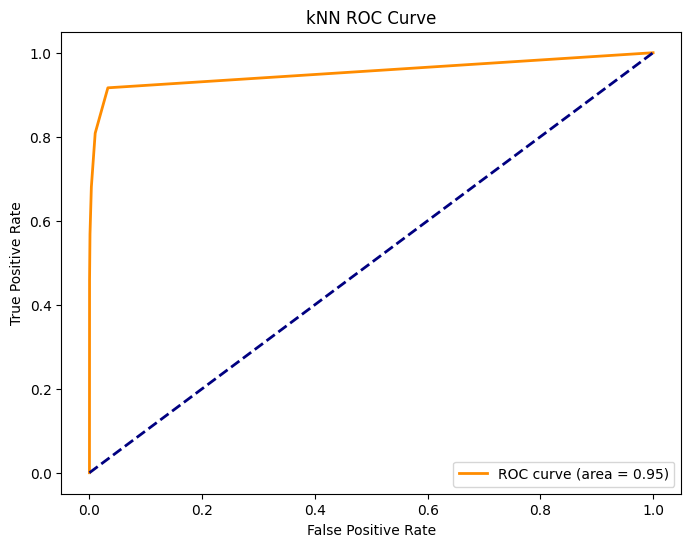

In [ ]:
y_scores = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('kNN ROC Curve')
plt.legend(loc='lower right')
plt.show()

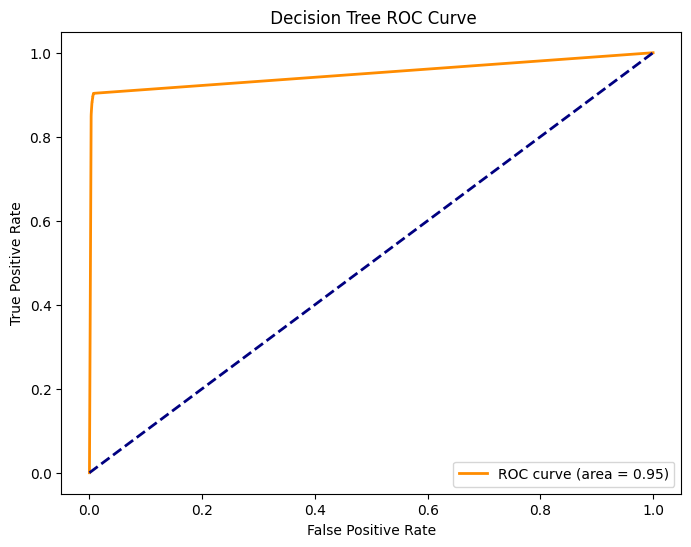

In [ ]:
y_scores = dt.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()

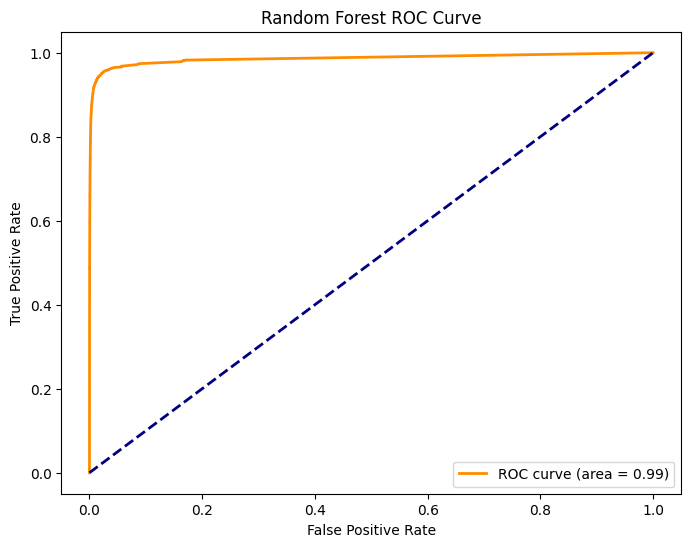

In [ ]:
y_scores = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

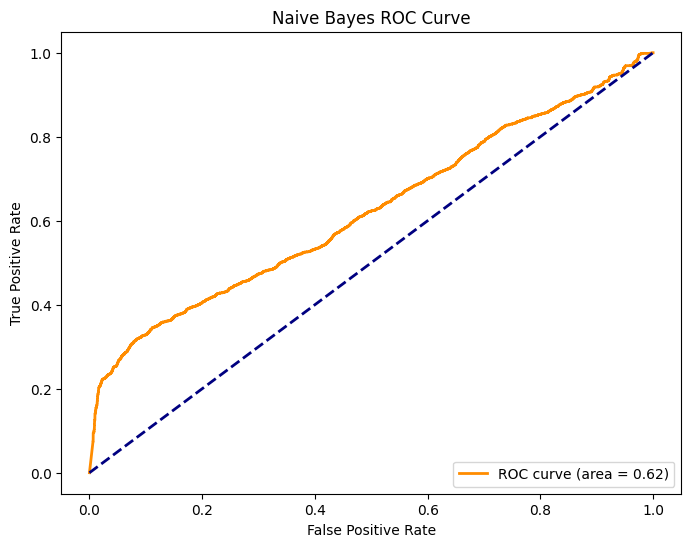

In [ ]:
y_scores = nb_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc='lower right')
plt.show()

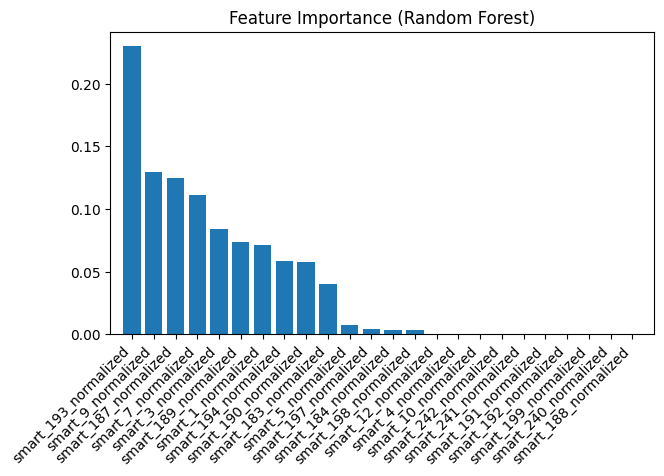

In [ ]:
# Get feature importances from Random Forest model
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure()
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), inputs.columns[indices])
plt.subplots_adjust(bottom=0.25)  # Increase bottom space for x-axis labels
plt.subplots_adjust(left=0.05)   # Increase left space for y-axis labels
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Adjust y-axis label rotation if needed

plt.xlim([-1, X_train.shape[1]])
plt.show()


In [ ]:
smart_193_normalized, smart_9_normalized, smart_187_normalized, smart_7_normalized, smart_3_normalized, smart_189_normalized, smart_1_normalized, smart_194_normalized, smart_190_normalized, smart_183_normalized, smart_5_normalized

In [ ]:
X=inputs[['smart_193_normalized', 'smart_9_normalized', 'smart_187_normalized', 'smart_7_normalized', 'smart_3_normalized', 'smart_189_normalized', 'smart_1_normalized', 'smart_194_normalized', 'smart_190_normalized', 'smart_183_normalized', 'smart_5_normalized']]

In [ ]:
X

,smart_193_normalized,smart_9_normalized,smart_187_normalized,smart_7_normalized,smart_3_normalized,smart_189_normalized,smart_1_normalized,smart_194_normalized,smart_190_normalized,smart_183_normalized,smart_5_normalized
0,98.0,62.0,100.0,89.0,96.0,98.0,115.0,30.0,70.0,100.0,100.0
1,70.0,58.0,100.0,81.0,92.0,97.0,111.0,24.0,76.0,100.0,100.0
2,90.0,77.0,100.0,90.0,94.0,100.0,119.0,31.0,69.0,100.0,100.0
3,95.0,68.0,100.0,85.0,92.0,90.0,111.0,23.0,77.0,100.0,100.0
4,95.0,78.0,100.0,90.0,92.0,100.0,117.0,36.0,64.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...
380073,91.0,67.0,100.0,87.0,97.0,100.0,117.0,37.0,63.0,100.0,100.0
380074,66.0,61.0,100.0,83.0,92.0,100.0,120.0,24.0,76.0,100.0,100.0
380075,96.0,71.0,100.0,84.0,95.0,100.0,119.0,18.0,82.0,100.0,100.0
380076,86.0,61.0,100.0,84.0,91.0,100.0,113.0,29.0,71.0,100.0,100.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , result, test_size=0.3)

In [ ]:
# Create DT classifier

dt = DecisionTreeClassifier(random_state=42,max_depth=25)

# Train the classifier
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Print accuracy classification report for DT
print('Classification Report for DT:')
print(classification_report(y_test, y_pred_dt))

Classification Report for DT:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    110276
           1       0.93      0.84      0.88      3743

    accuracy                           0.99    114019
   macro avg       0.96      0.92      0.94    114019
weighted avg       0.99      0.99      0.99    114019



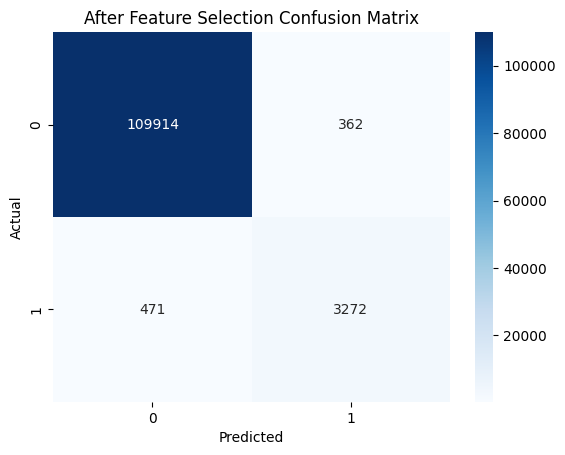

In [ ]:
conf(y_pred_dt,"After Feature Selection")

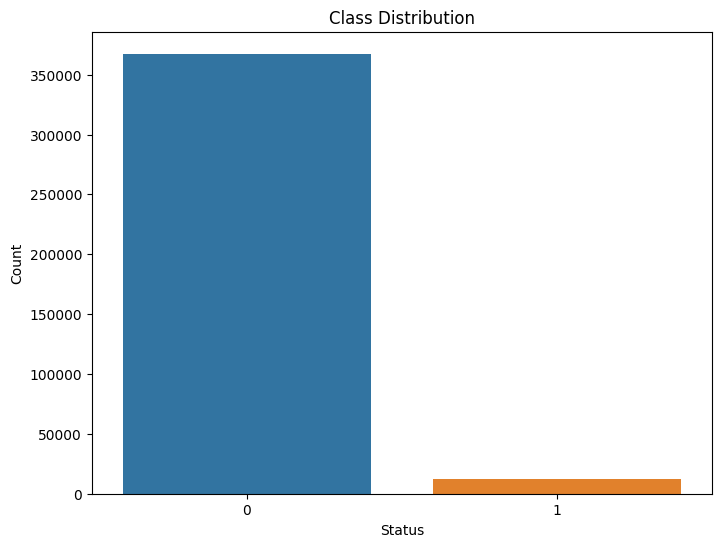

In [ ]:
# Class distribution bar plot
class_counts = result.value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

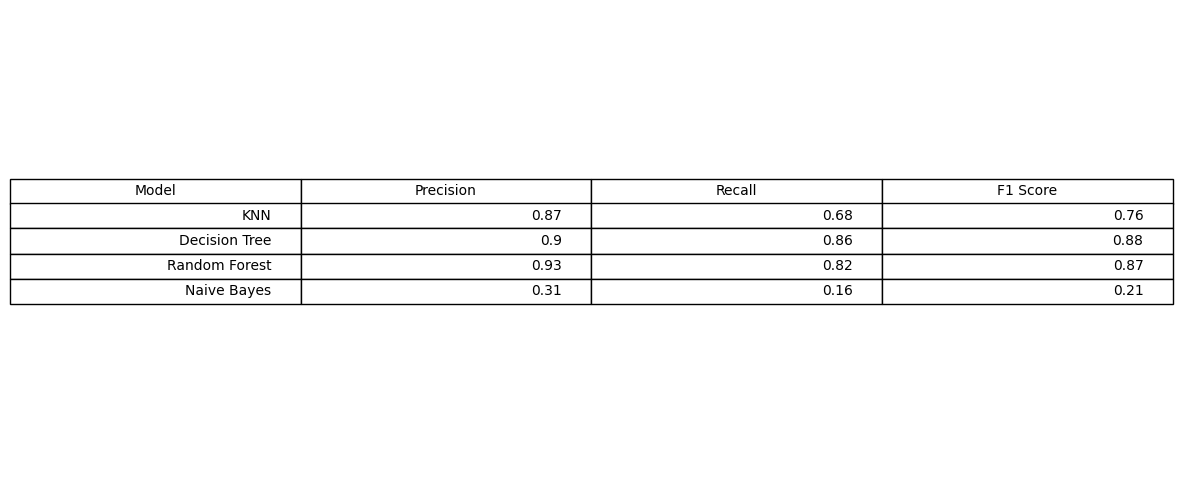

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']

# Precision, Recall, and F1 scores for each model
precision_scores = [0.87, 0.90, 0.93, 0.31]
recall_scores = [0.68, 0.86, 0.82, 0.16]
f1_scores = [0.76, 0.88, 0.87, 0.21]

# Create a table
fig, ax = plt.subplots(figsize=(10, 6))
table_data = np.array([models, precision_scores, recall_scores, f1_scores]).T
columns = ['Model', 'Precision', 'Recall', 'F1 Score']
table = plt.table(cellText=table_data, colLabels=columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)

plt.axis('off')
plt.show()


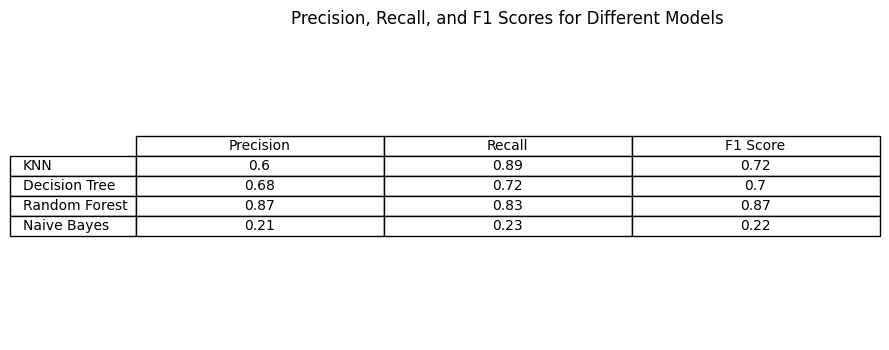

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']

# Precision, Recall, and F1 scores for each model
precision_scores = [0.60, 0.68, 0.87, 0.21]
recall_scores = [0.89, 0.72, 0.83, 0.23]
f1_scores = [0.72, 0.70, 0.87, 0.22]

# Create a transposed table
data = [precision_scores, recall_scores, f1_scores]
columns = ['Precision', 'Recall', 'F1 Score']

fig, ax = plt.subplots(figsize=(8, 4))
table = ax.table(cellText=np.transpose(data), rowLabels=models, colLabels=columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Remove axis
ax.axis('off')

plt.title('Precision, Recall, and F1 Scores for Different Models')
plt.show()


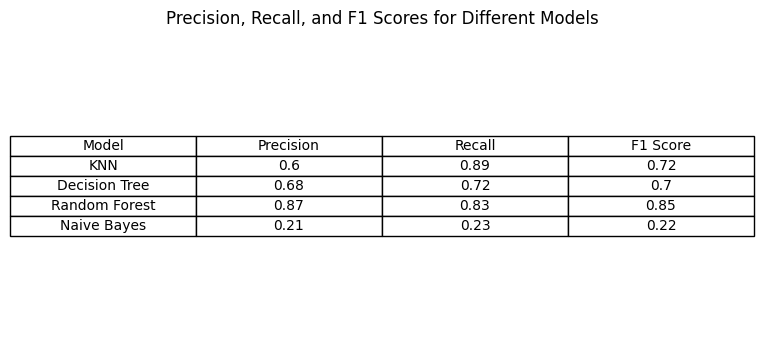

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']

# Precision, Recall, and F1 scores for each model
precision_scores = [0.60, 0.68, 0.87, 0.21]
recall_scores = [0.89, 0.72, 0.83, 0.23]
f1_scores = [0.72, 0.70, 0.85, 0.22]

# Create a transposed table with Model column
data = [models, precision_scores, recall_scores, f1_scores]
columns = ['Model', 'Precision', 'Recall', 'F1 Score']

fig, ax = plt.subplots(figsize=(8, 4))
table = ax.table(cellText=np.transpose(data), colLabels=columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Remove axis
ax.axis('off')

plt.title('Precision, Recall, and F1 Scores for Different Models')
plt.show()


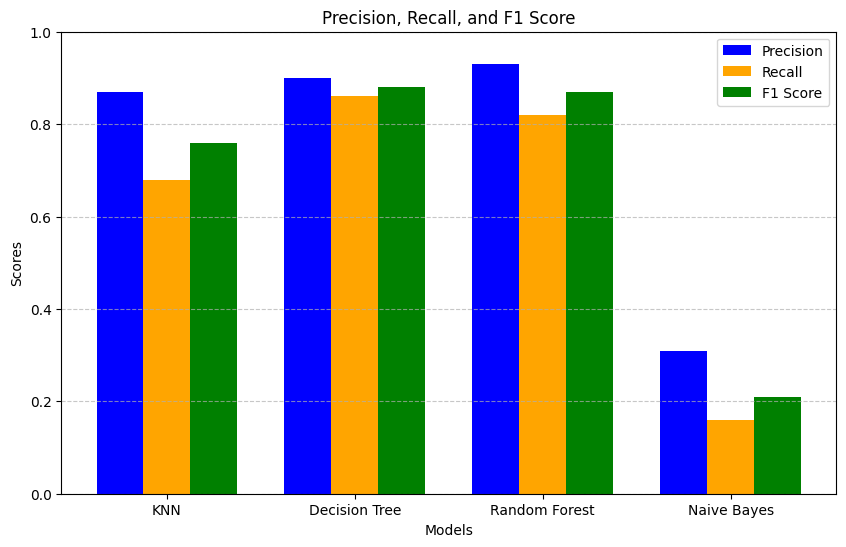

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']

# Precision, Recall, and F1 scores for each model
precision_scores = [0.87, 0.90, 0.93, 0.31]
recall_scores = [0.68, 0.86, 0.82, 0.16]
f1_scores = [0.76, 0.88, 0.87, 0.21]

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = np.arange(len(models))

bar1 = ax.bar(index, precision_scores, bar_width, label='Precision', color='blue')
bar2 = ax.bar(index + bar_width, recall_scores, bar_width, label='Recall', color='orange')
bar3 = ax.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1 Score', color='green')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend()

# Set y-axis range for more precision
ax.set_ylim(0, 1)

# Add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

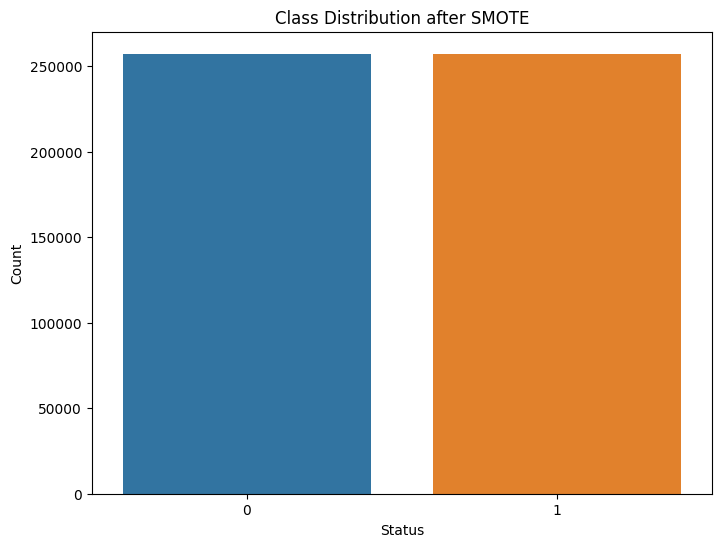

In [ ]:
# Class distribution bar plot
class_counts = y_resampled.value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Class Distribution after SMOTE')
plt.show()

In [ ]:
# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_resampled, y_resampled)
y_pred_knn = knn.predict(X_test)
print("k-Nearest Neighbors (kNN) Classification Report:")
print(accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test, y_pred_knn))
confusion_matrix(y_test,y_pred_knn)

In [ ]:
conf(y_pred_knn, "KNN")


In [ ]:
# Decision Tree (DT) with Hyperparameters
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_resampled, y_resampled)
y_pred_dt = dt.predict(X_test)
print("Decision Tree (DT) Classification Report:")
print(classification_report(y_test, y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))

In [ ]:
conf(y_pred_dt,"Decision Tree")

In [ ]:
y_scores = dt.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Random Forest (RF)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)
print("Random Forest (RF) Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
confusion_matrix(y_test,y_pred_rf)


In [ ]:
conf(y_pred_rf,"Random Forest")

In [ ]:
y_train.value_counts()

In [ ]:

# Handle class imbalance using SMOTE
sampling = {0:257207,1:257207}
smote = SMOTE(sampling_strategy=sampling, random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# NB
nb = GaussianNB()
nb.fit(X_resampled, y_resampled)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print(accuracy_score(y_test,y_pred_nb))
conf(y_pred_nb,"Naive Bayes")

<Axes: >

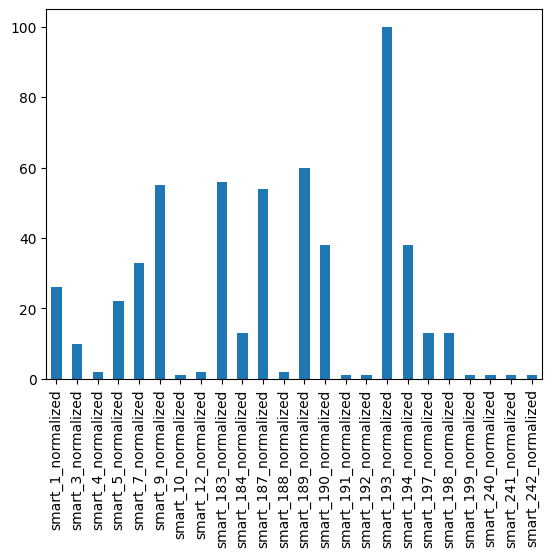

In [ ]:
inputs.nunique().plot(kind='bar')

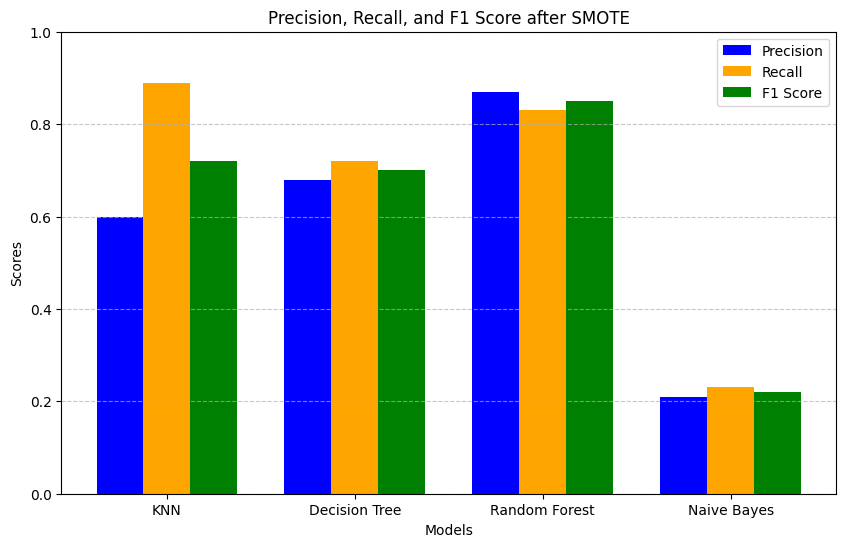

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
precision_scores = [0.6, 0.68, 0.87, 0.21]
recall_scores = [0.89, 0.72, 0.83, 0.23]
f1_scores = [0.72, 0.7, 0.85, 0.22]

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
index = np.arange(len(models))

bar1 = ax.bar(index, precision_scores, bar_width, label='Precision', color='blue')
bar2 = ax.bar(index + bar_width, recall_scores, bar_width, label='Recall', color='orange')
bar3 = ax.bar(index + 2 * bar_width, f1_scores, bar_width, label='F1 Score', color='green')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1 Score after SMOTE')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend()

# Set y-axis range for more precision
ax.set_ylim(0, 1)

# Add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


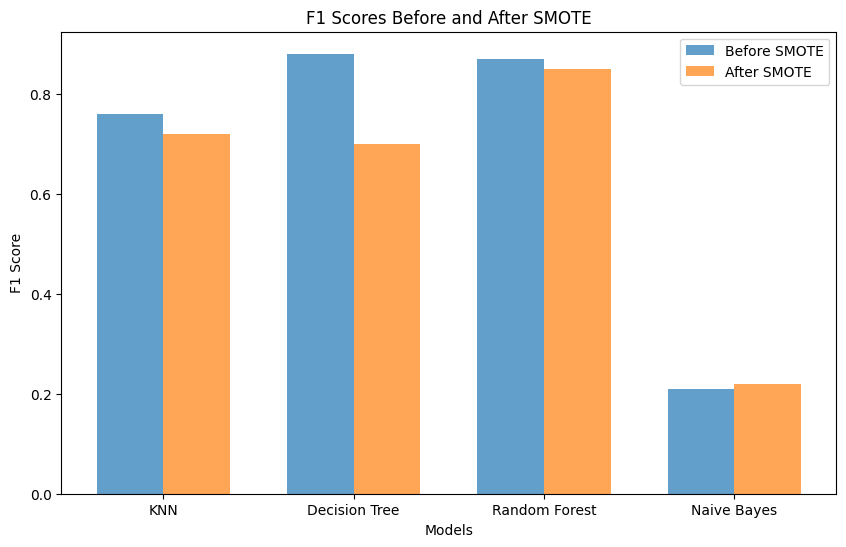

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']

# F1 scores before SMOTE
f1_scores_after_smote = [0.72, 0.70, 0.85, 0.22]

# F1 scores after SMOTE
f1_scores_before_smote =  [0.76, 0.88, 0.87, 0.21]

# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(models))

plt.bar(index, f1_scores_before_smote, width=bar_width, label='Before SMOTE', alpha=0.7)
plt.bar([i + bar_width for i in index], f1_scores_after_smote, width=bar_width, label='After SMOTE', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Scores Before and After SMOTE')
plt.xticks([i + bar_width/2 for i in index], models)
plt.legend()
plt.show()


# Clustering

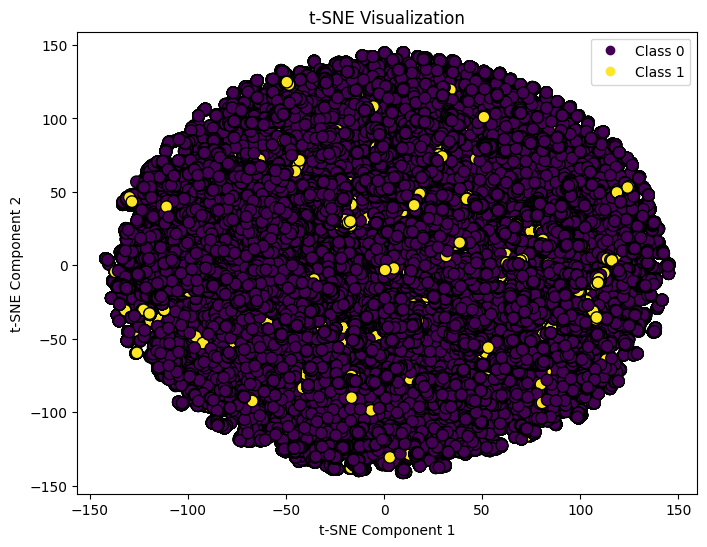

In [ ]:
X = inputs[0:1000,:]
y = result
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a scatter plot
plt.figure(figsize=(8, 6))

scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=70)
legend_labels = [f'Class {i}' for i in np.unique(y)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)



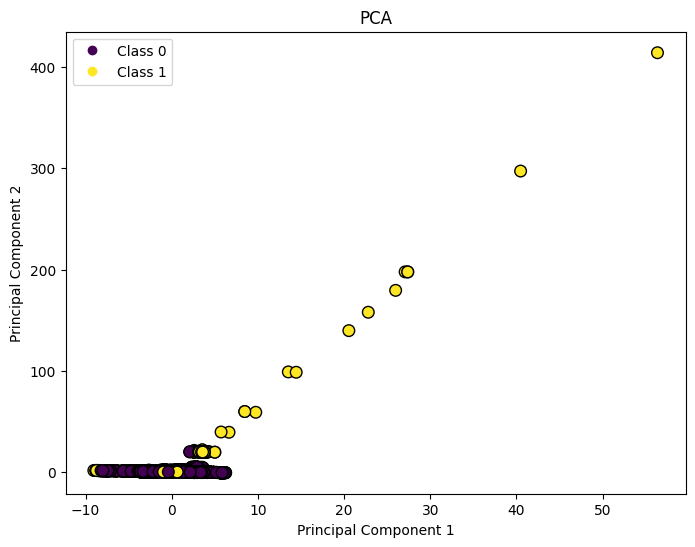

In [ ]:

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap='viridis', s=70)
legend_labels = [f'Class {i}' for i in np.unique(y)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler=StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)



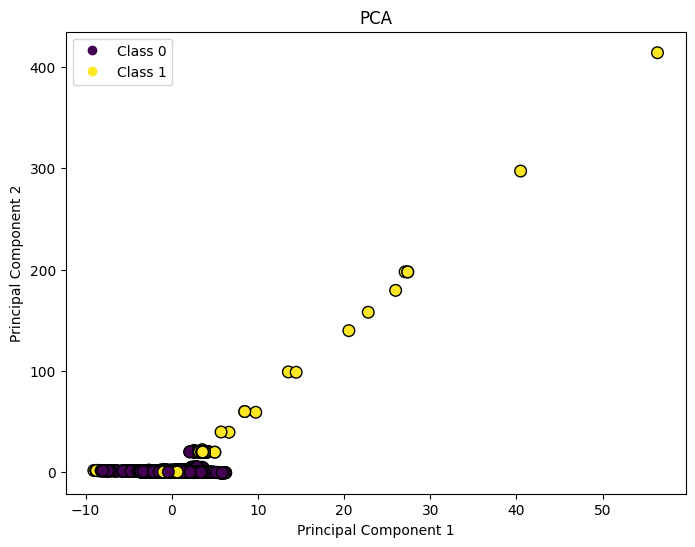

In [ ]:

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolor='k', cmap='viridis', s=70)
legend_labels = [f'Class {i}' for i in np.unique(y)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


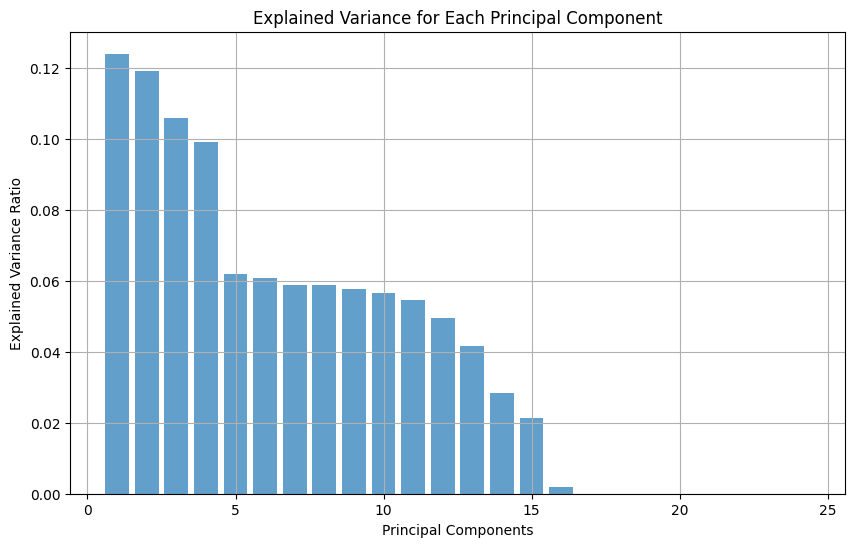

In [ ]:

# Get the explained variance ratio for all components
explained_variance_ratio = pca.explained_variance_ratio_

# Bar plot of explained variance for each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, align='center', alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance for Each Principal Component')
plt.grid(True)
plt.show()


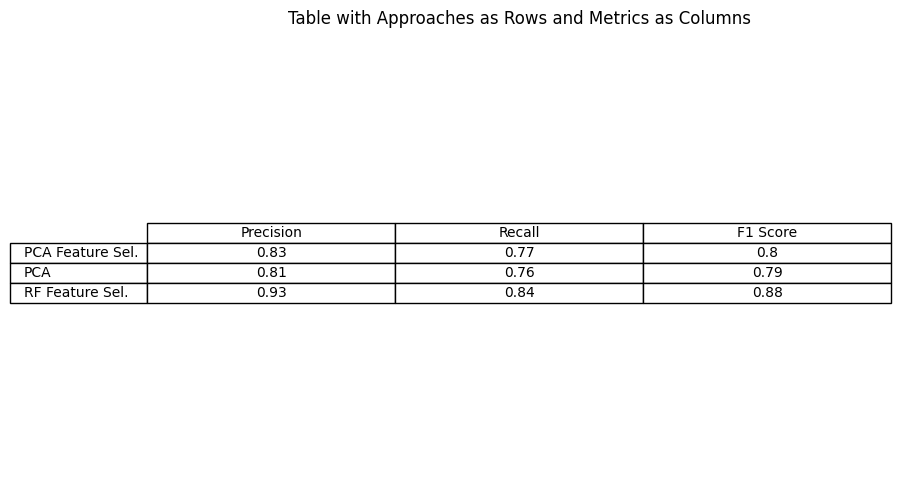

In [ ]:
import matplotlib.pyplot as plt

# Data for the table
approaches = ['PCA Feature Sel.', 'PCA', 'RF Feature Sel.']
metrics = ['Precision', 'Recall', 'F1 Score']
values = [
    [0.83, 0.77, 0.80],
    [0.81, 0.76, 0.79],
    [0.93, 0.84, 0.88]
]


fig, ax = plt.subplots(figsize=(8, 6))
table = ax.table(cellText=values, rowLabels=approaches, colLabels=metrics, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Remove axis
ax.axis('off')

plt.title('Table')
plt.show()


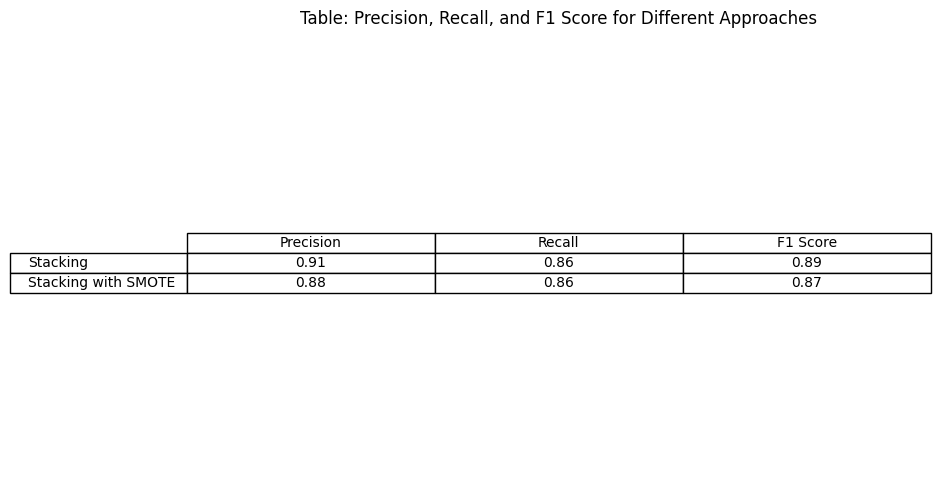

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the table
approaches = ['Stacking', 'Stacking with SMOTE']
metrics = ['Precision', 'Recall', 'F1 Score']
values = [
    [0.91, 0.86, 0.89],
    [0.88, 0.86, 0.87]
]

# Create a DataFrame for better organization
df = pd.DataFrame(values, columns=metrics, index=approaches)

# Plotting the table
fig, ax = plt.subplots(figsize=(8, 6))
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Remove axis
ax.axis('off')

plt.title('Table: Precision, Recall, and F1 Score for Different Approaches')
plt.show()


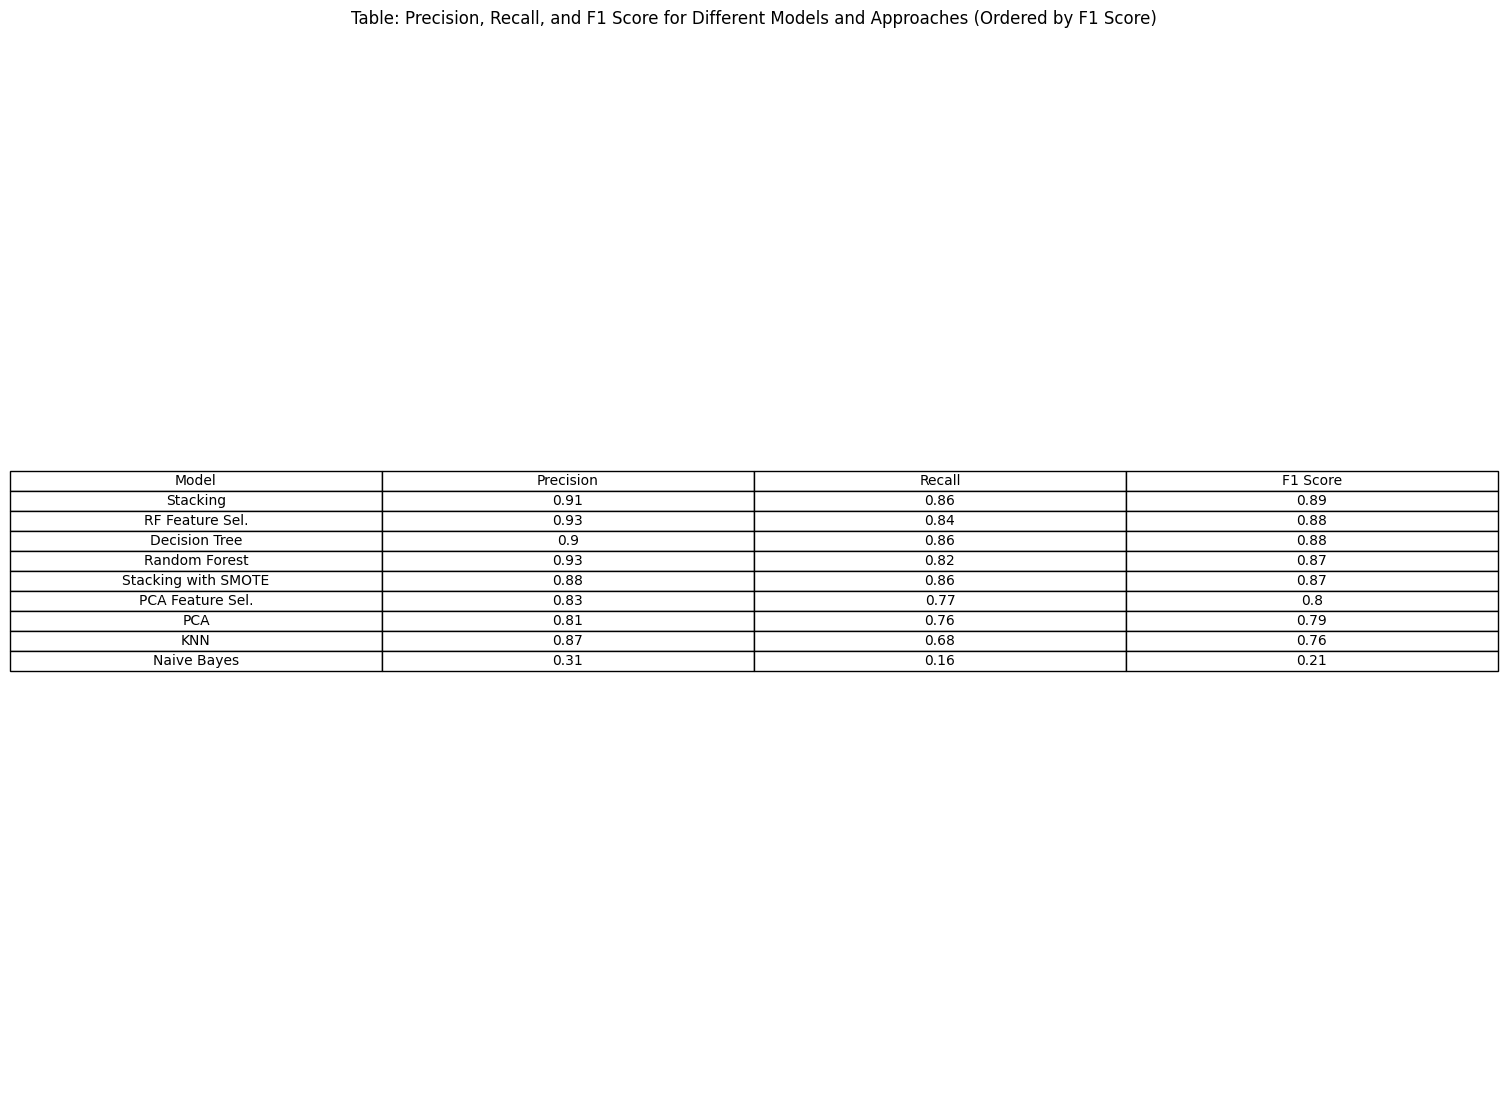

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the table
models = ['PCA', 'PCA Feature Sel.', 'RF Feature Sel.', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Stacking', 'Stacking with SMOTE']
approaches = ['PCA', 'PCA Feature Sel.', 'RF Feature Sel.', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Stacking', 'Stacking with SMOTE']
metrics = ['Precision', 'Recall', 'F1 Score']
values = [
    [0.81, 0.76, 0.79],  # PCA
    [0.83, 0.77, 0.80],  # PCA Feature Selection
    [0.93, 0.84, 0.88],  # RF Feature Selection
    [0.87, 0.68, 0.76],  # KNN
    [0.90, 0.86, 0.88],  # Decision Tree
    [0.93, 0.82, 0.87],  # Random Forest
    [0.31, 0.16, 0.21],  # Naive Bayes
    [0.91, 0.86, 0.89],  # Stacking
    [0.88, 0.86, 0.87]   # Stacking with SMOTE
]

# Create a DataFrame for better organization
df = pd.DataFrame(values, columns=metrics, index=approaches)
df.insert(0, 'Model', models)

# Order by F1 Score
df = df.sort_values(by='F1 Score', ascending=False)

# Plotting the table
fig, ax = plt.subplots(figsize=(16, 14))
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Remove axis
ax.axis('off')

plt.title('Table: Precision, Recall, and F1 Score for Different Models and Approaches (Ordered by F1 Score)')
plt.show()


In [ ]:
import pandas as pd

# Data for the table
models = ['Random Forest', 'Stacking with SMOTE', 'Stacking', 'Decision Tree', 'KNN', 'PCA', 'PCA Feature Sel.', 'RF Feature Sel.', 'Naive Bayes']
approaches = ['Random Forest', 'Stacking with SMOTE', 'Stacking', 'Decision Tree', 'KNN', 'PCA', 'PCA Feature Sel.', 'RF Feature Sel.', 'Naive Bayes']
metrics = ['Precision', 'Recall', 'F1 Score']
values = [
    [0.93, 0.82, 0.87],  # Random Forest
    [0.88, 0.86, 0.87],  # Stacking with SMOTE
    [0.91, 0.86, 0.89],  # Stacking
    [0.90, 0.86, 0.88],  # Decision Tree
    [0.87, 0.68, 0.76],  # KNN
    [0.81, 0.76, 0.79],  # PCA
    [0.83, 0.77, 0.80],  # PCA Feature Selection
    [0.93, 0.84, 0.88],  # RF Feature Selection
    [0.31, 0.16, 0.21]   # Naive Bayes
]

# Create a DataFrame for better organization
df = pd.DataFrame(values, columns=metrics, index=approaches)
df.insert(0, 'Model', models)

# Order by F1 Score
df = df.sort_values(by='F1 Score', ascending=False)

# Output LaTeX code
latex_code = df.to_latex(index=False, escape=False, caption='Precision, Recall, and F1 Score for Different Models and Approaches (Ordered by F1 Score)', label='tab:results')

# Print LaTeX code
print(latex_code)


\begin{table}
\centering
\caption{Precision, Recall, and F1 Score for Different Models and Approaches (Ordered by F1 Score)}
\label{tab:results}
\begin{tabular}{lrrr}
\toprule
              Model &  Precision &  Recall &  F1 Score \\
\midrule
           Stacking &       0.91 &    0.86 &      0.89 \\
      Decision Tree &       0.90 &    0.86 &      0.88 \\
    RF Feature Sel. &       0.93 &    0.84 &      0.88 \\
      Random Forest &       0.93 &    0.82 &      0.87 \\
Stacking with SMOTE &       0.88 &    0.86 &      0.87 \\
   PCA Feature Sel. &       0.83 &    0.77 &      0.80 \\
                PCA &       0.81 &    0.76 &      0.79 \\
                KNN &       0.87 &    0.68 &      0.76 \\
        Naive Bayes &       0.31 &    0.16 &      0.21 \\
\bottomrule
\end{tabular}
\end{table}



<ipython-input-22-3aafa0eaf35e>:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = df.to_latex(index=False, escape=False, caption='Precision, Recall, and F1 Score for Different Models and Approaches (Ordered by F1 Score)', label='tab:results')


In [ ]:
# Visualize the data in the reduced space

# Train a Decision Tree classifier on the reduced dataset
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_pca[:,0:15], y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test_pca[:,:15])

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")
print(classification_report(y_test,y_pred))

Accuracy on the test set: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    110210
           1       0.83      0.77      0.80      3809

    accuracy                           0.99    114019
   macro avg       0.91      0.88      0.90    114019
weighted avg       0.99      0.99      0.99    114019



In [ ]:
# Visualize the data in the reduced space

# Train a Decision Tree classifier on the reduced dataset
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test_pca)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")
print(classification_report(y_test,y_pred))

Accuracy on the test set: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    110261
           1       0.81      0.76      0.79      3758

    accuracy                           0.99    114019
   macro avg       0.90      0.88      0.89    114019
weighted avg       0.99      0.99      0.99    114019



In [ ]:
# Visualize the data in the reduced space

# Train a Decision Tree classifier on the reduced dataset
dt_classifier = RandomForestClassifier(random_state=42)
dt_classifier.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test_pca)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")
print(classification_report(y_test,y_pred))

Accuracy on the test set: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    110261
           1       0.92      0.70      0.80      3758

    accuracy                           0.99    114019
   macro avg       0.96      0.85      0.90    114019
weighted avg       0.99      0.99      0.99    114019



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_standardized = scaler.fit_transform(X_resampled)
X_test_standardized = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA()
X_train_pca = pca.fit_transform(X_train_standardized)
X_test_pca = pca.transform(X_test_standardized)



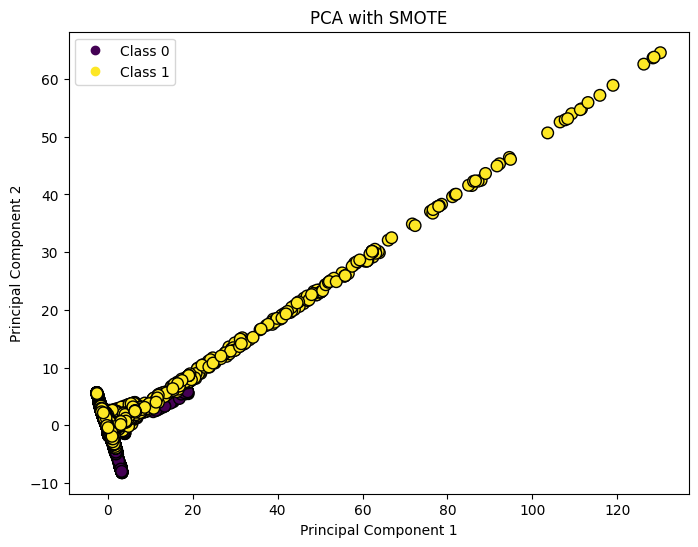

In [ ]:

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_resampled, edgecolor='k', cmap='viridis', s=70)
legend_labels = [f'Class {i}' for i in np.unique(y)]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.title('PCA with SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


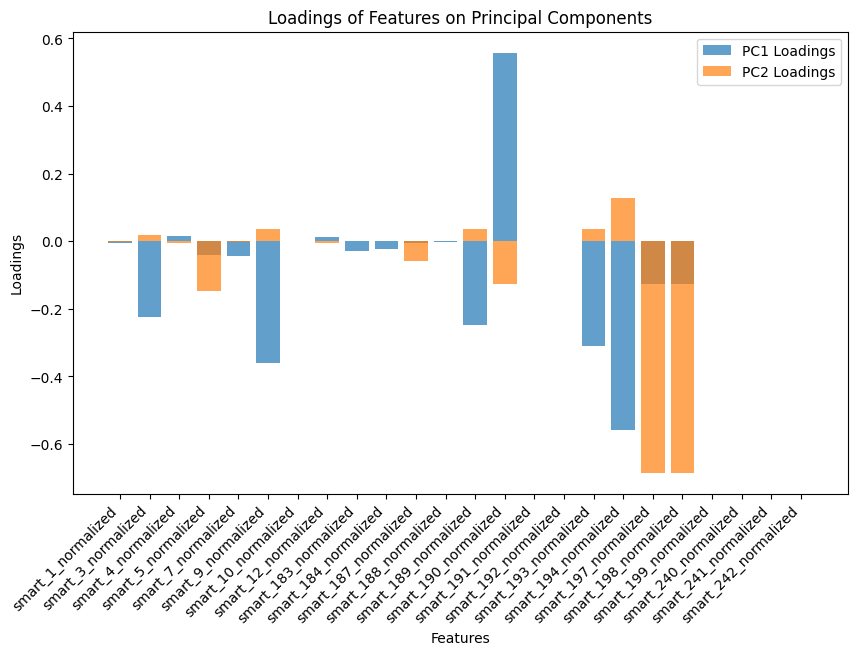

In [ ]:
# Get the principal components (loadings)
loadings = pca.components_

# Display the loadings
loadings_df = pd.DataFrame(loadings, columns=inputs.columns)

# Plot the loadings for the first two principal components
plt.figure(figsize=(10, 6))
plt.bar(inputs.columns, loadings[0], alpha=0.7, label='PC1 Loadings')
plt.bar(inputs.columns, loadings[1], alpha=0.7, label='PC2 Loadings')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.title('Loadings of Features on Principal Components')
plt.legend()
plt.show()

In [ ]:
# Visualize the data in the reduced space

# Train a Decision Tree classifier on the reduced dataset
dt_classifier = GaussianNB()
dt_classifier.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test_pca)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")
print(classification_report(y_test,y_pred))

Accuracy on the test set: 0.96
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    110261
           1       0.28      0.10      0.15      3758

    accuracy                           0.96    114019
   macro avg       0.62      0.55      0.57    114019
weighted avg       0.95      0.96      0.95    114019



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


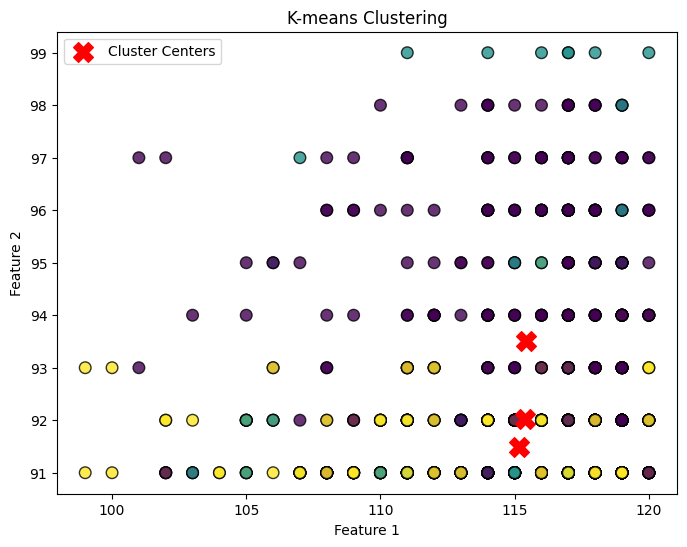

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = inputs.iloc[0:1000,:],result.iloc[0:1000]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the data points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=70, alpha=0.8)

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
X=X_train
wcss = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

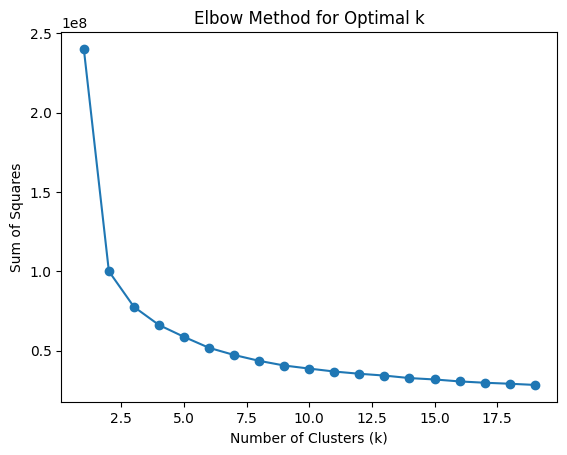

In [ ]:
# Plot the elbow graph
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squares')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate synthetic data for binary classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, result, test_size=0.3, random_state=42)

# Apply Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.97
Confusion Matrix:
[[110100     82]
 [  3644    193]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    110182
           1       0.70      0.05      0.09      3837

    accuracy                           0.97    114019
   macro avg       0.83      0.52      0.54    114019
weighted avg       0.96      0.97      0.95    114019



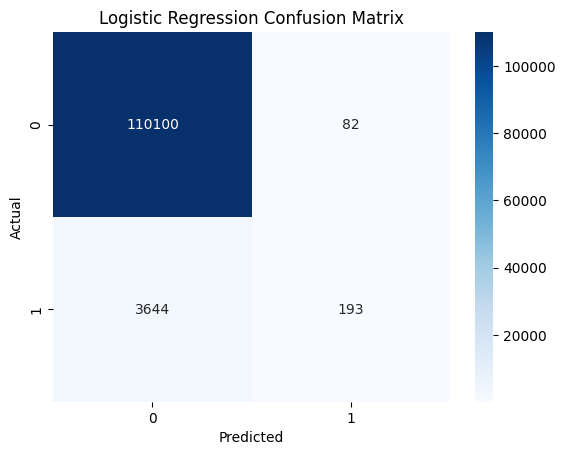

In [ ]:
conf(y_pred,"Logistic Regression")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate synthetic data for binary classification
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs, result, test_size=0.3, random_state=42)

# Apply Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.86
Confusion Matrix:
[[96835 13347]
 [ 2338  1499]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93    110182
           1       0.10      0.39      0.16      3837

    accuracy                           0.86    114019
   macro avg       0.54      0.63      0.54    114019
weighted avg       0.95      0.86      0.90    114019



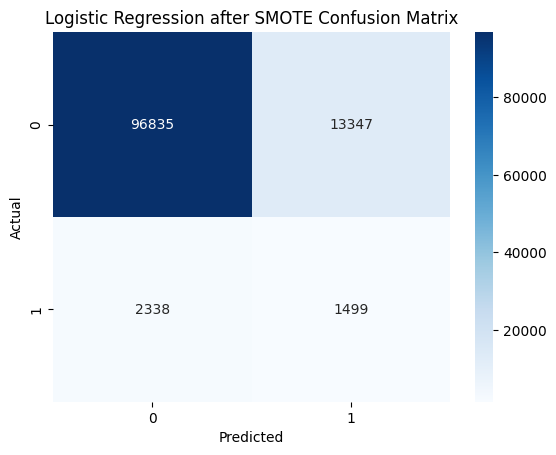

In [ ]:
conf(y_pred,"Logistic Regression after SMOTE")

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score


# Define base estimators
base_estimators = [
    ('rf', rf),
    ('dt', dt)
]

# Define the meta-estimator
meta_estimator = DecisionTreeClassifier(random_state=42,max_depth=10)

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=meta_estimator)

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test data
stacking_predictions = stacking_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, stacking_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110182
           1       0.91      0.86      0.89      3837

    accuracy                           0.99    114019
   macro avg       0.95      0.93      0.94    114019
weighted avg       0.99      0.99      0.99    114019



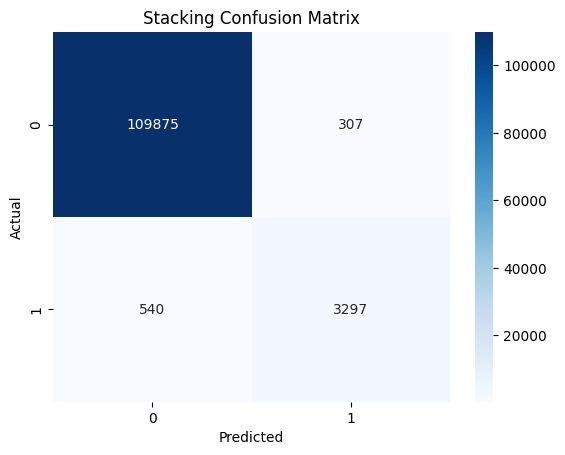

In [ ]:
conf(stacking_predictions,"Stacking")

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier(random_state=42)
dt=DecisionTreeClassifier(random_state=42)
# Define base estimators
base_estimators = [
    ('rf', rf),
    ('dt', dt)
]

# Define the meta-estimator
meta_estimator = DecisionTreeClassifier(random_state=42,max_depth=10)

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=meta_estimator)

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data
stacking_predictions = stacking_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, stacking_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110260
           1       0.88      0.86      0.87      3759

    accuracy                           0.99    114019
   macro avg       0.94      0.93      0.93    114019
weighted avg       0.99      0.99      0.99    114019



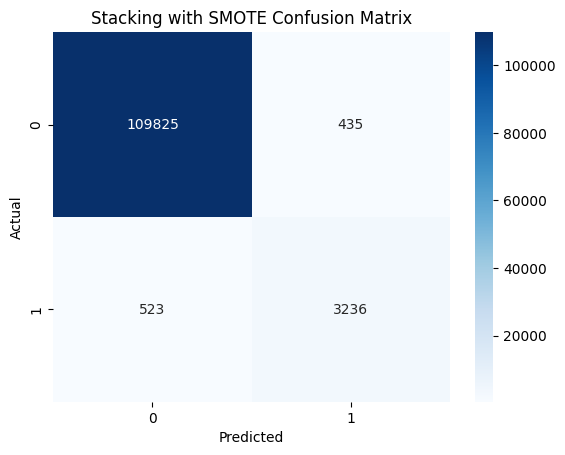

In [ ]:
conf(stacking_predictions,"Stacking with SMOTE")

# LIME

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=f17783ef51b740adef925232be7a4a793b3611063496e3d752349c0d2dae4c9e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Initialize the LIME explainer
explainer = LimeTabularExplainer(training_data=np.array(X_train),
                                 mode="classification",
                                 training_labels=y_train,
                                 random_state=42)

# Select an instance from the test set for explanation (change the index as needed)
instance_index = 10 #Replace with the index of the instance you want to explain

# Ensure the instance contains only numeric values (convert if necessary)
instance_to_explain = X_test.iloc[instance_index].astype(float)

# Generate an explanation for the kNN model
explanation = explainer.explain_instance(instance_to_explain, dt.predict_proba)

# Print the explanation for the kNN model
explanation.show_in_notebook()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
